# Download "oc" tool and log into Openshift

In [13]:

%%bash
curl -o oc.tar.gz -L https://mirror.openshift.com/pub/openshift-v4/clients/oc/4.5/linux/oc.tar.gz
tar xzf oc.tar.gz
cp oc ~/../bin/oc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 22.9M  100 22.9M    0     0  4203k      0  0:00:05  0:00:05 --:--:-- 4974k


In [5]:
import os

username = os.environ['USERNAME']
password = os.environ['PASSWORD']


!oc login -u $username -p $password --insecure-skip-tls-verify https://api.cluster-e857.e857.example.opentlc.com:6443
!oc project kubeflow
!oc get pods

KeyError: 'USERNAME'

# Serve Model with Seldon

In [6]:
%%bash
oc project opendatahub
#TODO CHANGE TO USE right model
#oc create -n opendatahub -f https://raw.githubusercontent.com/nakfour/odh-kubeflow/master/mymodel.json
oc delete sdep tfserving
#oc create -n opendatahub -f https://raw.githubusercontent.com/nakfour/mnist_and_elyra/main/model/mnist-ft-perc.yaml?token=AENNQ7YCAROGMFBRD3CENPC7QR5OQ
oc create -n opendatahub -f ../model/mnist-ft-perc.yaml    
oc get seldondeployments

Now using project "opendatahub" on server "https://api.cluster-e857.e857.example.opentlc.com:6443".
seldondeployment.machinelearning.seldon.io "tfserving" deleted
seldondeployment.machinelearning.seldon.io/tfserving created
NAME        AGE
tfserving   1s


# Download Test Data

In [4]:
# Download test data
# Download files from S3
import boto3
import os
s3_endpoint_url = os.environ['ENDPOINT_URL']
s3_access_key = os.environ['AWS_ACCESS_KEY_ID']
s3_secret_key = os.environ['AWS_SECRET_ACCESS_KEY']
s3_bucket="nakfour"

# Create an S3 client
s3 = boto3.client(service_name='s3',aws_access_key_id = s3_access_key,aws_secret_access_key = s3_secret_key, endpoint_url=s3_endpoint_url)

key = 'saved_data/xtestdata.pkl'
print(key)
s3.download_file(Bucket=s3_bucket, Key=key, Filename='xtestdata.pkl')


key = 'saved_data/ytestdata.pkl'
s3.download_file(Bucket=s3_bucket, Key=key, Filename='ytestdata.pkl')

saved_data/xtestdata.pkl


# Load Test Data

In [5]:
import pprint, pickle

pklxtest_file = open('xtestdata.pkl', 'rb')
x_test = pickle.load(pklxtest_file)
pprint.pprint(x_test)
pklxtest_file.close()

pklytest_file = open('ytestdata.pkl', 'rb')
y_test = pickle.load(pklytest_file)
pprint.pprint(y_test)
pklytest_file.close()

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
print(x_test[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 19

# Send a Test Image to Seldon Served Model

In [7]:
import json
data = json.dumps({"inputs": x_test[0].tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

Data: {"inputs": [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ... 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}


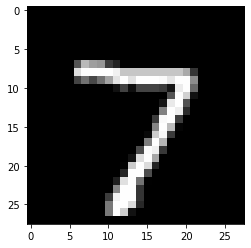

Model prediction: 7


In [9]:
!pip install -q requests

import matplotlib.pyplot as plt
import requests
import numpy as np
headers = {"content-type": "application/json"}
#json_response = requests.post('http://tf-serving-opendatahub.apps.jnakfour.dev.datahub.redhat.com/v1/models/mnist-model/:predict', data=data, headers=headers)
json_response = requests.post('http://tfserving-opendatahub.apps.cluster-e857.e857.example.opentlc.com/v1/models/mnist-model/:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['outputs']
#print(json_response.text)

# Display image and model prediction.
#for i in range(n_images):
plt.imshow(np.reshape(x_test[0], [28, 28]), cmap='gray')
plt.show()
print("Model prediction: %i" % np.argmax(predictions[0]))